### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt

In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

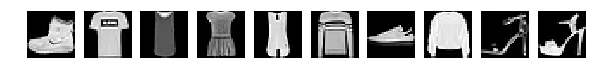

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


In [0]:
import matplotlib.pyplot as plt

plt.imshow(trainX[0],cmap='gray')

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))



#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model using model.fit()

In [16]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 9us/sample - loss: 177.7088 - acc: 0.2171 - val_loss: 7429.2183 - val_acc: 0.2135
Epoch 2/100
60000/60000 [==============================] - 0s 5us/sample - loss: 7363.5796 - acc: 0.2150 - val_loss: 11417.7998 - val_acc: 0.2551
Epoch 3/100
60000/60000 [==============================] - 0s 5us/sample - loss: 11419.2373 - acc: 0.2562 - val_loss: 13729.1602 - val_acc: 0.2338
Epoch 4/100
60000/60000 [==============================] - 0s 5us/sample - loss: 13728.7910 - acc: 0.2332 - val_loss: 13470.6484 - val_acc: 0.3687
Epoch 5/100
60000/60000 [==============================] - 0s 5us/sample - loss: 13473.9775 - acc: 0.3729 - val_loss: 12827.3408 - val_acc: 0.2844
Epoch 6/100
60000/60000 [==============================] - 0s 5us/sample - loss: 12787.4326 - acc: 0.2851 - val_loss: 11575.5400 - val_acc: 0.3752
Epoch 7/100
60000/60000 [==============================] - 0s 5us/sample

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [19]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5931 - acc: 0.7969 - val_loss: 0.5342 - val_acc: 0.8194
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4891 - acc: 0.8303 - val_loss: 0.4932 - val_acc: 0.8308
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4694 - acc: 0.8381 - val_loss: 0.4778 - val_acc: 0.8313
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4577 - acc: 0.8415 - val_loss: 0.4753 - val_acc: 0.8352
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4498 - acc: 0.8449 - val_loss: 0.4735 - val_acc: 0.8349
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4435 - acc: 0.8470 - val_loss: 0.4645 - val_acc: 0.8362
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4393 - acc: 0.8493 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [22]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4164 - acc: 0.8553 - val_loss: 0.4623 - val_acc: 0.8437
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4161 - acc: 0.8550 - val_loss: 0.4567 - val_acc: 0.8431
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4148 - acc: 0.8562 - val_loss: 0.4606 - val_acc: 0.8428
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4141 - acc: 0.8565 - val_loss: 0.4529 - val_acc: 0.8435
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4155 - acc: 0.8552 - val_loss: 0.4567 - val_acc: 0.8423
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4162 - acc: 0.8547 - val_loss: 0.4609 - val_acc: 0.8433
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4142 - acc: 0.8566 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

## Review model

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 23,196
Trainable params: 21,628
Non-trainable params: 1,568
______________________________________________

### Run the model

In [29]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 75us/sample - loss: 2.2636 - acc: 0.1947 - val_loss: 2.1970 - val_acc: 0.6252
Epoch 2/100
60000/60000 [==============================] - 4s 63us/sample - loss: 1.9872 - acc: 0.6299 - val_loss: 1.5801 - val_acc: 0.7427
Epoch 3/100
60000/60000 [==============================] - 4s 65us/sample - loss: 1.0273 - acc: 0.7482 - val_loss: 0.7186 - val_acc: 0.7569
Epoch 4/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.6339 - acc: 0.7761 - val_loss: 0.5944 - val_acc: 0.7758
Epoch 5/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5705 - acc: 0.7847 - val_loss: 0.5797 - val_acc: 0.7702
Epoch 6/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5555 - acc: 0.7940 - val_loss: 0.5596 - val_acc: 0.8083
Epoch 7/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5229 - acc: 0.8376 - val_l